In [70]:
# Import Dependencies 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Part 1: Prepare the Data

#### Import CSV

In [71]:
file_path = Path("resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [73]:
df.nunique()

AGE            5
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
MYOPIC         2
dtype: int64

In [74]:
df.shape

(618, 15)

In [75]:
df.duplicated().sum()

0

In [76]:
myopic_col = df["MYOPIC"]
myopia_df = df.drop("MYOPIC", axis=1)

In [77]:
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


### Standardise Dataset 

In [78]:
myopia_scaled = StandardScaler().fit_transform(myopia_df)

In [79]:
myopia_scaled[1]

array([-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
       -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
       -0.34093217, -0.87508755,  0.98713773,  1.0032415 ])

## Part 2: Dimensionality Reduction

##### PCA model’s explained variance set to 90%

In [80]:
pca = PCA(n_components=0.9)

In [97]:
myopia_pca = pca.fit_transform(myopia_scaled)

In [81]:
myopia_pca[1]

array([-0.62470559, -1.57578643, -0.79425306,  1.156287  ,  0.2922565 ,
        0.34906013, -0.45520626,  0.28533229,  0.68968261, -0.55703083])

In [82]:
myopia_pca_df = pd.DataFrame(myopia_pca)

In [83]:
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [84]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [85]:
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(myopia_pca_df)

c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [86]:
tsne_features.shape

(618, 2)

In [87]:
myopia_pca_df['x'] = tsne_features[:,0]
myopia_pca_df['y'] = tsne_features[:,1]

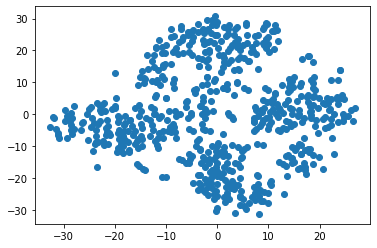

In [88]:
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

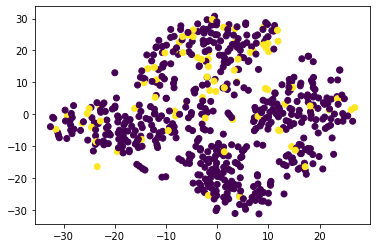

In [89]:
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=myopic_col)
plt.show()

## Part 3: Cluster Analysis with K-means

In [95]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be rais

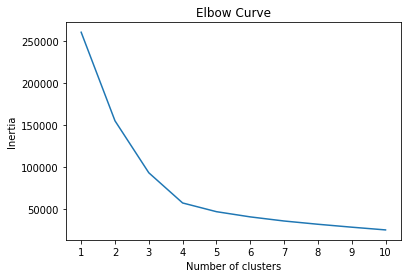

In [96]:
plt.title('Elbow Curve')
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Elbow of curve = 3

In [93]:
model = KMeans(n_clusters=4, random_state=0)

model.fit(myopia_pca_df)

predictions = model.predict(myopia_pca_df)

# Add the predicted class column to the dataframe
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2,3,4,5,6,7,8,9,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-8.304687,1.009718,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-5.054688,25.633440,3
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-3.533170,-21.626005,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,9.422297,8.066915,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-24.622961,2.118500,2


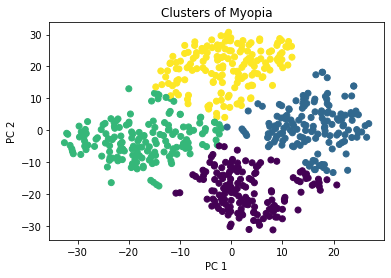

In [94]:
plt.scatter(x=myopia_pca_df['x'], y=myopia_pca_df['y'], c=myopia_pca_df['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of Myopia')
plt.show()

## Part 4: Make a Recommendation

Observationally though producing the K-mean graph we can see that the elbow forms around an X value of 4, indicating that an optimal cluster grouping of 4 is present in this dataset.